<a href="https://colab.research.google.com/github/Vaishnavihonbute/ai/blob/main/Heart%20Prediction%20Disease%20AI%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [3]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving dataset_heart.csv to dataset_heart.csv


In [4]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
df = pd.read_csv('dataset_heart.csv')


In [6]:
# Explore the dataset
print(df.head())
print(df.info())


   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise induced angina  oldpeak  ST segment  major vessels

In [7]:
# Define features (X) and target variable (y)
X = df.drop('heart disease', axis=1)
y = df['heart disease']


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

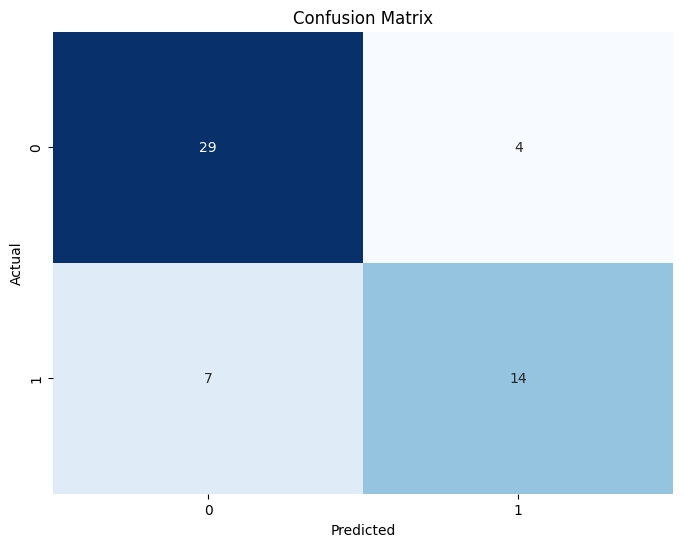

In [14]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Feature Importance Bar Plot
feature_importance = model.feature_importances_
feature_names = X.columns
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
df_importance = df_importance.sort_values(by='Importance', ascending=False)


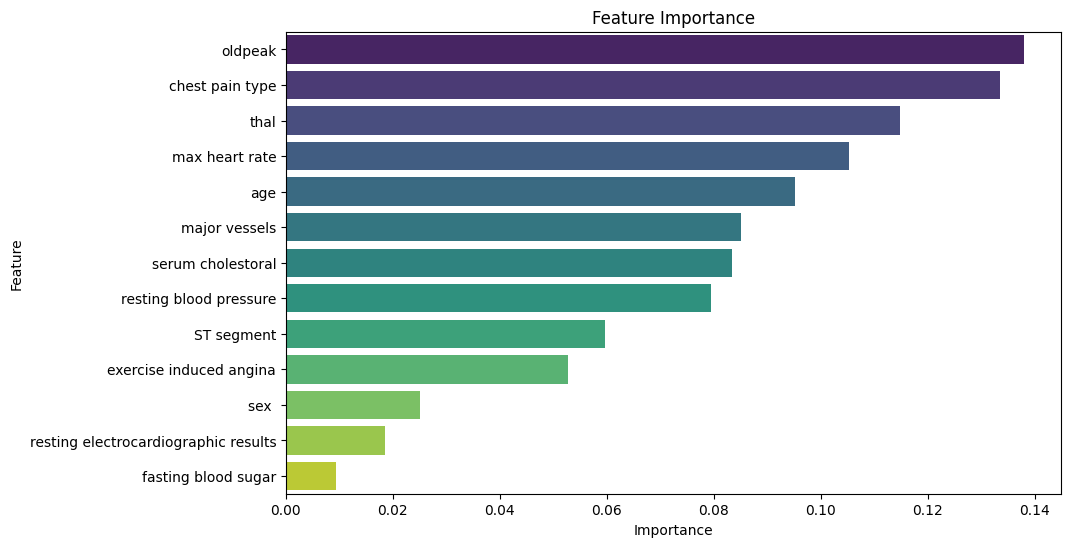

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [12]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7962962962962963
Confusion Matrix:
[[29  4]
 [ 7 14]]
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.88      0.84        33
           2       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



In [18]:
# Create a DataFrame with hypothetical scenarios for a pregnant lady
pregnant_lady_data = pd.DataFrame({
    'age': [28, 30, 32],
    'sex': [0, 0, 0],  # Assuming 0 for female
    'chest pain type': [3, 2, 1],
    'resting blood pressure': [120, 118, 122],
    'serum cholestoral': [200, 190, 180],
    'fasting blood sugar': [0, 0, 0],
    'resting electrocardiographic results': [1, 0, 1],
    'max heart rate': [160, 155, 150],
    'exercise induced angina': [0, 0, 0],
    'oldpeak': [0.0, 0.5, 1.0],
    'ST segment': [1, 2, 3],
    'major vessels': [0, 1, 2],
    'thal': [3, 2, 1]
})

In [20]:
# Update the column names in the pregnant_lady_data DataFrame to match the training dataset
pregnant_lady_data.columns = X.columns


In [21]:
# Make predictions for the pregnant lady scenarios
predictions = model.predict(pregnant_lady_data)


In [22]:
# Add predictions to the DataFrame
pregnant_lady_data['heart disease risk'] = predictions

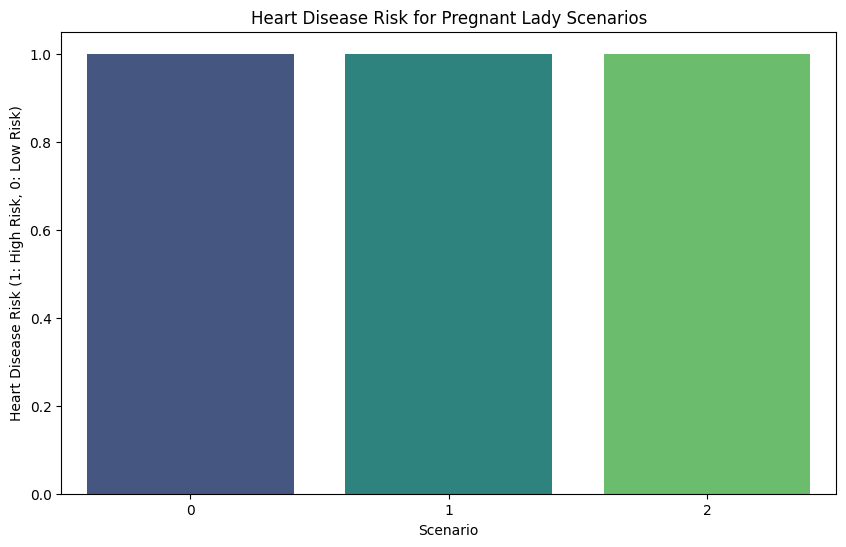

In [23]:
# Plot the heart disease risk for the pregnant lady scenarios
plt.figure(figsize=(10, 6))
sns.barplot(x=pregnant_lady_data.index, y='heart disease risk', data=pregnant_lady_data, palette='viridis')
plt.title('Heart Disease Risk for Pregnant Lady Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Heart Disease Risk (1: High Risk, 0: Low Risk)')
plt.show()

In [13]:
# Save the model
import joblib
joblib.dump(model, 'heart_disease_prediction_model.pkl')

['heart_disease_prediction_model.pkl']